In [138]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import load_iris
from matplotlib.colors import LightSource
from tabulate import tabulate
from time import perf_counter
from sklearn.datasets import load_breast_cancer
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import MultipleLocator
from sklearn.model_selection import train_test_split
from time import perf_counter
from sklearn.preprocessing import LabelBinarizer
import random
import pandas as pd
import seaborn as sns
import math
import matplotlib.colors
import sklearn

def plot_matriz_confusion_metrics(axes,y_true,y_score,threshold=0.5,fontsize=15):

    y_pred=y_score>threshold

    TP=sum((y_true==1) & (y_pred==1))
    TN=sum((y_true==0) & (y_pred==0))
    FN=sum((y_true==1) & (y_pred==0))
    FP=sum((y_true==0) & (y_pred==1))

    precision=TP/(TP+FP)
    negative_predictive_value=TN/(TN+FN)
    recall_sensitivity=TP/(TP+FN)
    specificity=TN/(TN+FP)
    accuracy=(TP+TN)/(TP+TN+FP+FN)
    f1_score=2/((1/recall_sensitivity)+(1/precision))
    mcc=((TP*TN)-(FP*FN))/(math.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN)))
    auc=None #sklearn.metrics.roc_auc_score(y_true,y_score)

    plot_matriz_confusion(axes,TP=TP,TN=TN,FP=FP,FN=FN,fontsize=fontsize,
        precision=precision,
        negative_predictive_value=negative_predictive_value,
        recall_sensitivity=recall_sensitivity,
        specificity=specificity,
        accuracy=accuracy,
        f1_score=f1_score,
        mcc=mcc,
        auc=auc)



def plot_matriz_confusion(axes,TP=0,TN=0,FP=0,FN=0,fontsize=15,precision=None,negative_predictive_value=None,recall_sensitivity=None,specificity=None,accuracy=None,f1_score=None,mcc=None,auc=None):
    success_color=matplotlib.colors.to_rgb('#9EE548')
    failure_color=matplotlib.colors.to_rgb("#C32240")
    blanco_color=matplotlib.colors.to_rgb("#FFFFFF")


    if ((precision is not None) | 
        (negative_predictive_value is not None) | 
        (recall_sensitivity is not None) |
        (specificity is not None) | 
        (accuracy is not None) |
        (f1_score is not None) | 
        (mcc is not None) |
        (auc is not None) ):
        show_metrics=True
    else:
        show_metrics=False


    if show_metrics==False:
        axes.imshow([[success_color,failure_color],[failure_color,success_color]])
    else:
        axes.imshow([[success_color,failure_color,blanco_color],[failure_color,success_color,blanco_color],[blanco_color,blanco_color,blanco_color]])



    labels = ['Positivo','Negativo']
    xaxis = np.arange(len(labels))
    axes.set_xticks(xaxis)
    axes.set_yticks(xaxis)
    axes.set_xticklabels(labels, fontsize=13, color="#003B80")
    axes.set_yticklabels(labels, fontsize=13, color="#003B80")
    axes.text(0, 0, str(TP)+" TP",ha="center", va="center", color="#0A2102",fontsize=fontsize)
    axes.text(0, 1, str(FP)+" FP",ha="center", va="center", color="#FAEAEA",fontsize=fontsize) 
    axes.text(1, 0, str(FN)+" FN",ha="center", va="center", color="#FAEAEA",fontsize=fontsize)
    axes.text(1, 1, str(TN)+" TN",ha="center", va="center", color="#0A2102",fontsize=fontsize)         
    axes.xaxis.tick_top()
    axes.set_xlabel('Predicción', fontsize=fontsize, color="#003B80") 
    axes.xaxis.set_label_position('top') 
    axes.set_ylabel('Realidad', fontsize=fontsize, color="#003B80") 


    if show_metrics==True:


        if (precision is not None):
            axes.text(0, 2, f"Precision\n{precision:.2f}",ha="center", va="center", color="#0A2102",fontsize=fontsize-4)
        if (negative_predictive_value is not None):
            axes.text(1, 2, f"NPV\n{negative_predictive_value:.2f}",ha="center", va="center", color="#0A2102",fontsize=fontsize-4)
        if (recall_sensitivity is not None):
            axes.text(2, 0, f"Sensitivity\n{recall_sensitivity:.2f}",ha="center", va="center", color="#0A2102",fontsize=fontsize-4) 
        if (specificity is not None):
            axes.text(2, 1, f"Specificity\n{specificity:.2f}",ha="center", va="center", color="#0A2102",fontsize=fontsize-4) 

        metricas_generales=""
        if (accuracy is not None):
            metricas_generales=metricas_generales+f"Accurancy\n{accuracy:.2f}\n"
        if (f1_score is not None):
            metricas_generales=metricas_generales+f"F1-score\n{f1_score:.2f}\n"   
        if (mcc is not None):
            metricas_generales=metricas_generales+f"MCC\n{mcc:.2f}\n"  
        if (auc is not None):
            metricas_generales=metricas_generales+f"AUC\n{auc:.2f}"             

        axes.text(2, 2, metricas_generales,ha="center", va="center", color="#0A2102",fontsize=fontsize-4)          



    


Verdaderos Positivos= 8
Verdaderos Negativos= 4
Falsos Positivos= 3
Falsos Negativos= 5


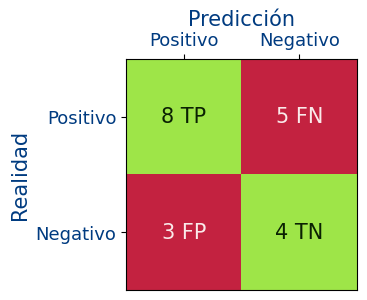

In [139]:
#Ejercicio 1
print("Verdaderos Positivos=",8)
print("Verdaderos Negativos=",4)
print("Falsos Positivos=",3)
print("Falsos Negativos=",5)


figure=plt.figure(figsize=(3, 3)) 
axes=figure.add_subplot(1,1,1)
plot_matriz_confusion(axes,TP=8,TN=4,FP=3,FN=5)




In [140]:
#Ejercicio 2.A
y_score=np.array([0.27, 0.45,  0.76,  0.55,  0.28, 0.04, 0.34,0.4, 0.66, 0.88, 0.94,0.47,0.2])
y_pred=y_score>0.5

print(y_pred)

[False False  True  True False False False False  True  True  True False
 False]


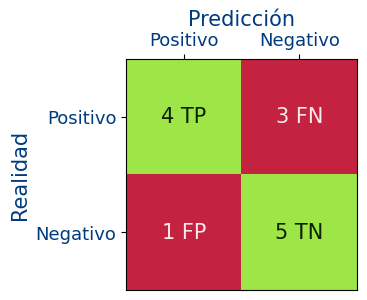

In [141]:
#Ejercicio 2.B

y_true=np.array([1,0,1,0,0,0,1,0,1,1,1,1,0])
y_score=np.array([0.27, 0.45,  0.76,  0.55,  0.28, 0.04, 0.34,0.4, 0.66, 0.88, 0.94,0.47,0.2])
y_pred=y_pred>0.5


TP=sum((y_true==1) & (y_pred==1))
TN=sum((y_true==0) & (y_pred==0))
FN=sum((y_true==1) & (y_pred==0))
FP=sum((y_true==0) & (y_pred==1))


figure=plt.figure(figsize=(3, 3)) 
axes=figure.add_subplot(1,1,1)
plot_matriz_confusion(axes,TP=TP,TN=TN,FP=FP,FN=FN)


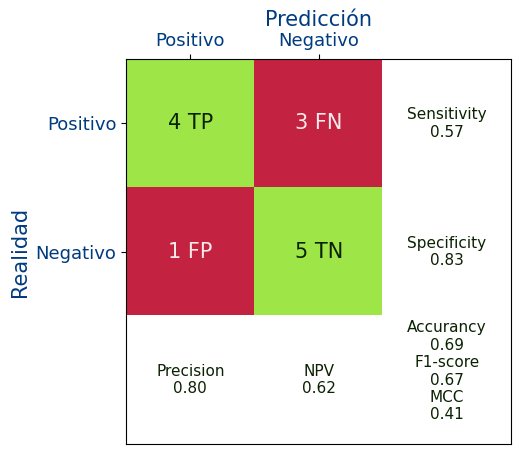

In [142]:
#Ejercicio 2.C


y_true=np.array([1,0,1,0,0,0,1,0,1,1,1,1,0])
y_score=np.array([0.27, 0.45,  0.76,  0.55,  0.28, 0.04, 0.34,0.4, 0.66, 0.88, 0.94,0.47,0.2])
y_pred=y_pred>0.5

TP=sum((y_true==1) & (y_pred==1))
TN=sum((y_true==0) & (y_pred==0))
FN=sum((y_true==1) & (y_pred==0))
FP=sum((y_true==0) & (y_pred==1))

accuracy=(TP+TN)/(TP+TN+FP+FN)
precision=TP/(TP+FP)
recall_sensitivity=TP/(TP+FN)
negative_predictive_value=TN/(TN+FN)
specificity=TN/(TN+FP)
f1_score=2/((1/recall_sensitivity)+(1/precision))
mcc=((TP*TN)-(FP*FN))/(math.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN)))

figure=plt.figure(figsize=(5, 5)) 
axes=figure.add_subplot(1,1,1)
plot_matriz_confusion(axes,TP=TP,TN=TN,FP=FP,FN=FN,
        precision=precision,
        negative_predictive_value=negative_predictive_value,
        recall_sensitivity=recall_sensitivity,
        specificity=specificity,
        accuracy=accuracy,
        f1_score=f1_score,
        mcc=mcc)

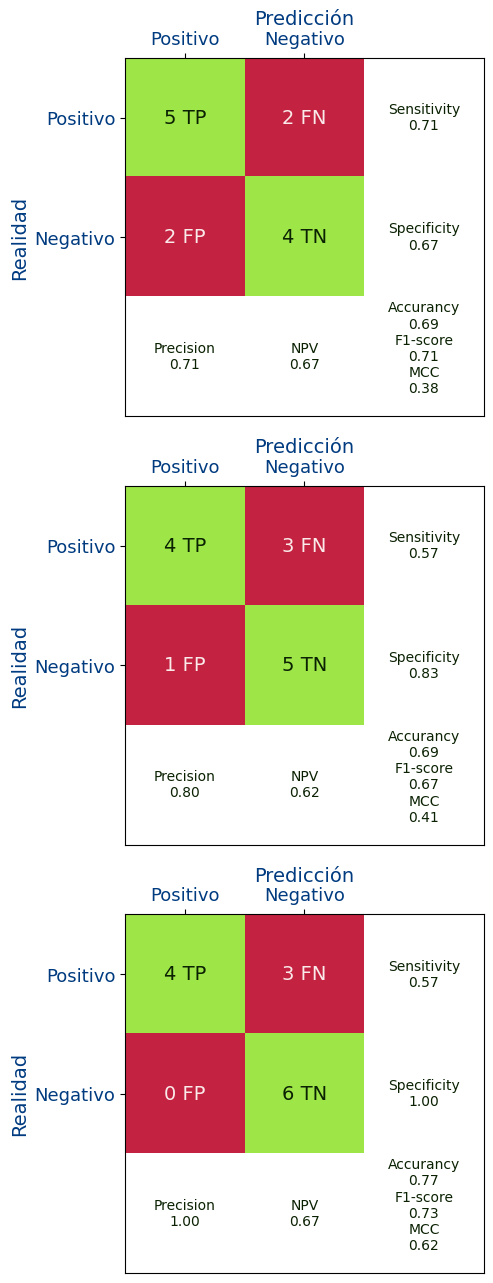

In [147]:
#Ejercicio 3
y_true=np.array([1,0,1,0,0,0,1,0,1,1,1,1,0])
y_score=np.array([0.27, 0.45,  0.76,  0.55,  0.28, 0.04, 0.34,0.4, 0.66, 0.88, 0.94,0.47,0.2])


figure=plt.figure(figsize=(7, 13)) 
axes=figure.add_subplot(3,1,1)
plot_matriz_confusion_metrics(axes,y_true,y_score,threshold=0.4,fontsize=14)
axes=figure.add_subplot(3,1,2)
plot_matriz_confusion_metrics(axes,y_true,y_score,threshold=0.5,fontsize=14)
axes=figure.add_subplot(3,1,3)
plot_matriz_confusion_metrics(axes,y_true,y_score,threshold=0.6,fontsize=14)

figure.tight_layout()

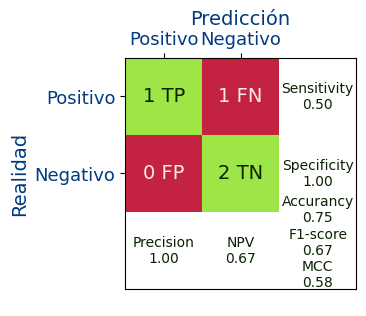

In [189]:
y_true = np.array([0.0, 1.0, 0.0, 1.0])
y_score = np.array([0.1, 0.9, 0.4, 0.1])


figure=plt.figure(figsize=(3,3)) 
axes=figure.add_subplot(1,1,1)
plot_matriz_confusion_metrics(axes,y_true,y_score,threshold=0.5,fontsize=14)

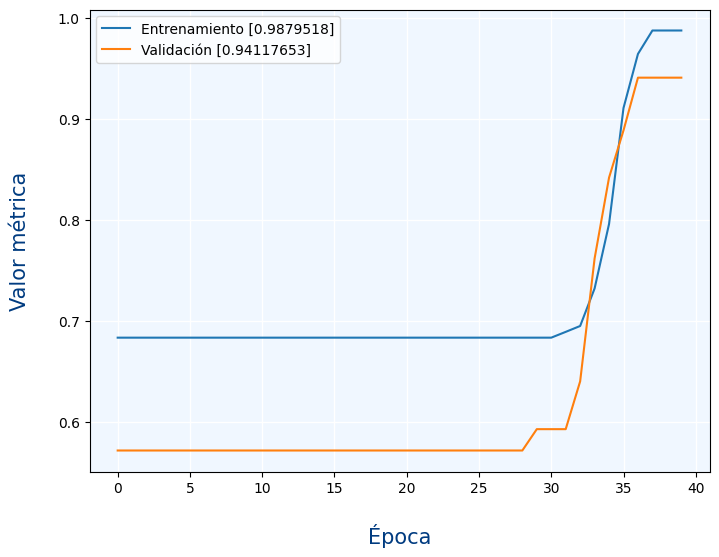

In [188]:
import numpy as np
import tensorflow as tf
import numpy as np
import pandas as pd
import keras
import random
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow_addons as tfa
 
iris=load_iris()
x=iris.data[0:99,2]
y_true=iris.target[0:99]
 
np.random.seed(5)
tf.random.set_seed(5)
random.seed(5)  
 
x_train, x_test, y_train, y_test = train_test_split(x, y_true, test_size=0.2, random_state=42)
 
model=Sequential()
model.add(Dense(3, input_dim=1,activation="sigmoid",kernel_initializer="glorot_normal"))
model.add(Dense(1,activation="sigmoid",kernel_initializer="glorot_normal"))
model.compile(loss="binary_crossentropy",optimizer=tf.keras.optimizers.Adam(learning_rate=0.009),metrics=[tfa.metrics.F1Score(num_classes=1, threshold=0.5,name="f1score")])
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=40,verbose=False)
 
figure=plt.figure(figsize=(8,6))
axes = figure.add_subplot()
 
axes.plot(history.history['f1score'],label="Entrenamiento "+str(history.history['f1score'][-1]))
axes.plot(history.history['val_f1score'],label="Validación "+str(history.history['val_f1score'][-1]))
 
axes.legend()
axes.set_xlabel('Época', fontsize=15,labelpad=20,color="#003B80")  
axes.set_ylabel('Valor métrica', fontsize=15,labelpad=20,color="#003B80")
axes.set_facecolor("#F0F7FF")
axes.grid(visible=True, which='major', axis='both',color="#FFFFFF",linewidth=1)

In [176]:
import tensorflow as tf
import tensorflow_addons as tfa
t, p = np.array([0,0,0,1,1,1]).reshape(-1,1), np.array([1,0,1,1,0,1]).reshape(-1,1)




m = tfa.metrics.F1Score(num_classes=1, threshold=0.5)
m.update_state(t, p)
m.result() 

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.57142854], dtype=float32)>

In [173]:
sklearn.metrics.f1_score(t,p)

0.5714285714285715